# **Prática 06 – Aprendizado Semi Supervisionado**

**Alunos:

GIOVANNI SURIANI FERREIRA

JORGE ALIOMAR TROCOLI ABDON DANTAS**

**Enunciado(s):**
Nesta atividade prática, você deverá:
1. Aplicar um algoritmo de aprendizado semi-supervisionado ao conjunto de dados utilizado no trabalho prático.
2. Comparar o desempenho do modelo semi-supervisionado com o desempenho de um modelo supervisionado
treinado apenas com os dados rotulados.
3. Reportar os resultados na plataforma Kaggle, destacando as diferenças de desempenho entre os dois métodos.
4. Utilize como base o melhor modelo obtido na Prática 04 ou, alternativamente, o XGBoost

**Desafio e problema escolhido:**
- Home Credit Default Risk (https://www.kaggle.com/competitions/home-credit-default-risk)

# PREPARAÇÃO DA BASE DE DADOS - Todos os dados

In [38]:
#Importando Bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Otimizador Giovanni
#from sklearnex import patch_sklearn
#patch_sklearn()

#CSV_PATH = "/home/gi/Desktop/Semestre8/Inteligencia_Computacional/TP1_csvs" # Path Giovanni
#validacao_cruzada_num_folds = 10 # Para Giovanni
CSV_PATH = "E:/Documentos/CEFET/OneDrive/Documentos/2ECOM067_INTELIGENCIA-COMPUTACIONAL-I_T01/TP1/bases/" # Path Jorge
validacao_cruzada_num_folds = 3 # Para Jorge

In [39]:
#Carregando Base de dados principal - Treino
df_train = pd.read_csv(f"{CSV_PATH}/df_train_full.csv")
df_test  = pd.read_csv(f"{CSV_PATH}/df_test_full.csv")

# Normalização Padrão (não realizada)

In [40]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# PREPARAÇÃO DA BASE DE DADOS - Amostra

In [41]:
#Realizar transformação das variáveis categóricas em variáveis númericas (Label Enconder)

#Importação da biblioteca
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#Busca dos atributos do tipo object e category - TREINO
colunas_categoricas_train = df_train.select_dtypes(include=['object', 'category']).columns.tolist()

#Substituição dos valores nulos por nada nas colunas categoricas
for c in colunas_categoricas_train:
    df_train[c] = df_train[c].fillna("")
    df_test[c] = df_test[c].fillna("")

#Concatenação dos dataframes treino e teste com o objetivo de realizar um label enconder com códigos únicos
df_all = pd.concat([df_train, df_test], axis=0)
print(df_train[colunas_categoricas_train].shape)
print(df_all.shape)
for coluna in colunas_categoricas_train:
    print(coluna)
    le.fit(df_all[coluna])
    df_train[coluna] = le.transform(df_train[coluna].astype(str))
    df_test[coluna] = le.transform(df_test[coluna].astype(str))


(307511, 33)
(356255, 195)
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
CREDIT_ACTIVE
CREDIT_CURRENCY
CREDIT_TYPE
STATUS
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [42]:
#Amostra df_train
df_train = df_train.sample(frac=0.1, random_state=42)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30751 entries, 245895 to 297062
Columns: 195 entries, SK_ID_CURR to CNT_INSTALMENT_MATURE_CUM
dtypes: float64(106), int64(89)
memory usage: 46.0 MB


In [44]:
#Divisão treino
X_train = df_train.drop(columns={"TARGET"})
y_train = df_train.TARGET

In [45]:
#Verificar se y_train tem 0 e 1. Se true, OK dá para continuar a modelagem
#                                Se false, ajustar para que tenha 0 e 1
set(y_train) == {0, 1}

True

# 1. Treinamento Individual dos Classificadores

In [46]:
#Importanto as Bibliotecas dos classificadores
#from sklearn.tree           import DecisionTreeClassifier   # Árvore de Decisão
from sklearn.neighbors      import KNeighborsClassifier     # KNN
from sklearn.svm            import SVC                      # SVM
from sklearn.linear_model   import LogisticRegression       # LogisticRegression
from sklearn.ensemble       import RandomForestClassifier   # Random Forest
from xgboost                import XGBClassifier            # XGBClassifier             
from lightgbm               import LGBMClassifier           # LGBMClassifier 
from catboost               import CatBoostClassifier       # CatBoostClassifier 

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [47]:
#Instanciamento do classificador
classifier = XGBClassifier( random_state=42,
                            max_depth = 6,       # profundidade das árvores
                            learning_rate = 0.1, # taxa de aprendizado
                            n_estimators = 200   # número de árvores
                          )

In [48]:
classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
X_train_anterior = X_train.copy()
y_train_anterior = y_train.copy()

In [50]:
avaliacao_soma = df_test.index.stop
avaliacao_soma
iteracao = 1

In [ ]:
while ((avaliacao_soma > 0) and (iteracao <=100)):
    
    classifier = XGBClassifier( random_state=42,
                            max_depth = 6,       # profundidade das árvores
                            learning_rate = 0.1, # taxa de aprendizado
                            n_estimators = 200   # número de árvores
                          )

    print("Iteração: ", iteracao)

    #Treinar modelo 1
    classifier.fit(X_train_anterior, y_train_anterior)

    #Realizando a predição com dados não rotulados (X_test)
    X_test_anterior = df_test.copy()
    preds_anterior  = classifier.predict(X_test_anterior)

    # Criar um DataFrame com as predições
    df_preds_anterior = pd.DataFrame(preds_anterior, columns=['TARGET'])

    #Criar novos dataframes
    df_train_novo = pd.concat([X_train_anterior, y_train_anterior], axis=1)
    df_test_novo =  pd.concat([X_test_anterior, df_preds_anterior], axis=1)

    #concatenando os Dataframes dos dados rotulados e não rotulados preditos
    novo_dataframe = pd.concat([df_train_novo, df_test_novo], axis = 0)

    #Divisão treino do novo_dataframe
    X_train_novo = novo_dataframe.drop(columns={"TARGET"})
    y_train_novo = novo_dataframe.TARGET

    #Treinar Modelo 2
    classifier.fit(X_train_novo, y_train_novo)

    X_test_original = df_test.copy()
    preds_novo = classifier.predict(X_test_original)

    # Avaliação Local
    print("ROC_AUC no teste:", roc_auc_score(preds_anterior, preds_novo))

    pred_train = classifier.predict(X_train)
    print("ROC_AUC no treino:", roc_auc_score(y_train, pred_train))


    avaliacao = pd.DataFrame({
        'Pred_Antigo': preds_anterior,
        'Pred_Novo': preds_novo,
        'Diferenca_absoluta': abs(preds_anterior-preds_novo)})

    avaliacao_soma = avaliacao.Diferenca_absoluta.sum()

    X_train_anterior = X_train_novo
    y_train_anterior = y_train_novo

    iteracao = iteracao+1

    print("Avaliacao_soma", avaliacao_soma)

Iteração:  1


ROC_AUC no teste: 1.0
ROC_AUC no treino: 0.9981060606060606
Avaliacao_soma 0


In [ ]:
#Geração do Data Frame das predições com o Teste Global
df_kaggle_SemiSupervisionado = df_test.copy()
df_kaggle_SemiSupervisionado["TARGET"] = preds_novo

# Salvar os CSVs
df_kaggle_SemiSupervisionado[["SK_ID_CURR", "TARGET"]].to_csv("df_kaggle_SemiSupervisionado.csv", index=False)

#RESULTADOS

Implementou-se a técnica de Explation-Maximization. Em que o aprendizado é recursivo até a chegada do critério de parada ser atingido. Como método de avaliação e critério de parada utilizou-se a quantidade de valores alvos diferentes entre uma iteração e a iteração anterior, além de um limite de 100 iteraçoes. Tem-se como referênica para diferença 0 valor 0.
Na simulação corrente, tem-se os seguintes resultados abaixo. Observa-se que o ROC_AUC foi 1, e consequentemente o valor da avalização_soma igual a 0. O resultado é condizente, pois o ROC_auc é calculado entre os valores preditos antes e atual (novo).

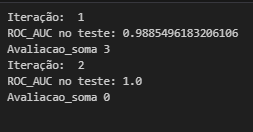

Submetendo os resultados ao Kaggle, obteve-se o seguinte resultado.
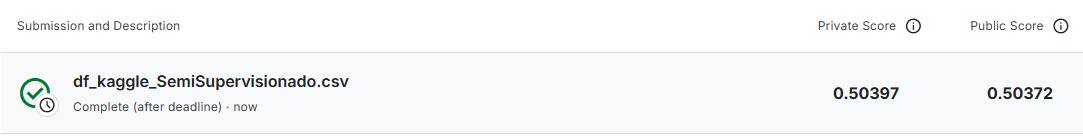

O valor obtido pelo Kaggle foi próximo aos valores obtidos anteriormente. Isso sugere que o aprendizado Semi-supervisionado, por ser menos custoso computacionalmente, pode ser utilizado para predizer/classificar um dataset.